<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Predicting Credit Card Default using Classification Models | Machine Learning</h2>
<h4>Models used Logistic Regression, CART, Random Forest, Neural Network</h4>
Created by <a href="https://www.linkedin.com/in/linginenivishal/"> Vishal Lingineni </a> <br>
Hult International Business School<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Purpose of this Script</h2><br>
This script is designed to analyze the <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Credit Card Dataset</a>, a popular learning dataset from Kaggle.
<br>
<h2>Analytical Objectives</h2><br>
Make a prediction on who will default in future
<br>

<h2> Methodology </h2> <br>
<li> Split dataset into training (60%), validation (20%) and test (20%).</li>
<li> We will train several machine learning algorithms to predict credit card fraud. </li>
<li> Select from the models you’ve validated the BEST model using the F1 criteria.</li>
<li> Run a final test using the test dataset you reserved.</li> 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<h1> Import packages and dataset </h1>

In [1]:
# Import modules:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_file='creditcard.csv'
df_creditcard=pd.read_csv(csv_file, index_col=0)
df_creditcard

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


<h4>User Defined Functions</h4>

In [3]:
# Define a function to compute F1 Score for Assignment 3.b
def f1_score(p, y):
# Follow the formulas for truth table and confusion matrix from
# https://en.wikipedia.org/wiki/Confusion_matrix
# Note: 
# p, and y must be arrays of 0, 1 of the same lengths

    comment01="""
    # Confusion Matrix:

          Actual
    Pred|  P | N 
     P  | TP | FP
     N  | FN | TN
    """

    tp=np.sum(p&y) #true positive
    tn=np.sum((1-p)&(1-y)) #true negative
    fp=np.sum(p)-tp #false positive (type i)
    fn=np.sum(1-p)-tn #false negative (type ii)
    f1=2*tp/(2*tp+fp+fn) # F1 score
    return f1, tp, sum(y)

In [4]:
# compute and output some summary statistics

def stat_summary(df_data, to_print):
    import numpy as np
    import pandas as pd
    stat_count=len(df_data.index)
    stat_mean=np.mean(df_data)
    stat_std=np.std(df_data)
    stat_max=np.max(df_data)
    stat_90pct=np.percentile(df_data, 90)
    stat_median=np.median(df_data)
    stat_min=np.min(df_data)

        
    #return
    df_stat_summary=pd.DataFrame({'count': len(df_data.index),
                    'mean': np.mean(df_data, axis=0),
                    'stdev': np.std(df_data, axis=0),
                    'stat_max': np.max(df_data, axis=0),
                    'stat_90pct': np.percentile(df_data, 90, axis=0),
                    'stat_75pct': np.percentile(df_data, 75, axis=0),
                    'stat_media': np.median(df_data, axis=0),
                    'stat_25pct': np.percentile(df_data, 25, axis=0),
                    'stat_10pct': np.percentile(df_data, 10, axis=0),
                    'stat_min': np.min(df_data, axis=0)} ,
                     index = df_data.columns)
    
    #print?
    if to_print:
        print(df_stat_summary)
        
    return df_stat_summary
# end of function stat_summary


#df_stat=stat_summary(df_creditcard, True)
#df_stat.to_csv('ccsummary_out.csv') # this is the .csv output file.  open to view

<h4>Handling Missing values </h4>

In [5]:
df_creditcard.isnull().sum(axis=0)

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We don't have any missing values hence no need to for imputations

<h1>Preparation of Data for Modeling</h1>

<h4>Transforming the variable </h4>

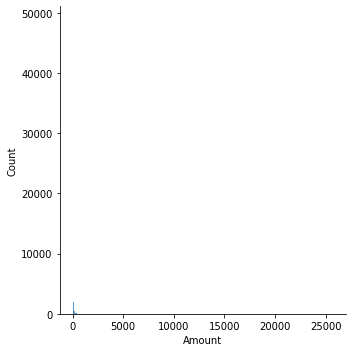

In [6]:
sns.displot(data=df_creditcard, x='Amount')
plt.show()

<strong> Note: </strong> <br>
<li>Notice, V1-V28 and Amount are features.  Except for 'Amount', it appears that </li>
<li>The source of the data had hidden the meaning of the features (other than 'Amount'). This may be due to privacy or confitentiality reasons. </li>
<li>It is also evident that the 'Amount' will need to transformed into log and normalization.  </li>
<li>Will first transform the Amount into log(Amount). </li>

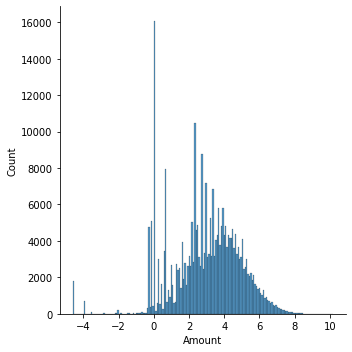

In [7]:
df_creditcard['Amount']=np.log(df_creditcard['Amount']+0.01) 
# we are adding this 0.01 because we have some values are 0 and log of 0 is infinite
sns.displot(data=df_creditcard, x='Amount')
plt.show()

<h4>Train Test Split </h4>

In [8]:
# We will handle feature normalization AFTER we split the samples into train/validate/test sub samples:

# let's first split the data set
from sklearn.model_selection import train_test_split

X=np.array(df_creditcard.iloc[:,0:-1]) # get features from df, convert to array for easy numerical operation
y=np.array(df_creditcard['Class']) # get target, note y=1 for bankruptcy, 0 for no bankruptcy

# splitting into training, and test
# note: use stratify as y=1 is rare (~3% of total observation). stratify ensures that positives are split proportionally
Xtra, Xtest, ytra, ytest = train_test_split(X, y, stratify=y, test_size=0.20, random_state=0)
# further split training into train and validation
Xtra, Xval, ytra, yval = train_test_split(Xtra, ytra, stratify=ytra, test_size=0.25, random_state=0)
# final split is 60:20:20, tra:val:test

<h4>Normalizing the data</h4>

In [9]:
# Now lets normalize features

from sklearn import preprocessing
x_scaler = preprocessing.StandardScaler().fit(Xtra)

print(pd.DataFrame({'mean': x_scaler.mean_, 'stdev': x_scaler.scale_}))
Xtra = x_scaler.transform(Xtra)
Xval = x_scaler.transform(Xval) 
Xtest = x_scaler.transform(Xtest) 


        mean     stdev
0  -0.001962  1.958596
1   0.000358  1.660070
2   0.000663  1.510103
3   0.001067  1.415569
4   0.004293  1.372323
5   0.002928  1.329652
6   0.000213  1.220275
7   0.003190  1.187730
8  -0.000714  1.098283
9   0.000635  1.084003
10  0.000842  1.021678
11 -0.001293  0.998748
12 -0.001323  0.996591
13  0.003388  0.956323
14 -0.000740  0.916705
15  0.000556  0.876172
16 -0.000904  0.850386
17 -0.000431  0.838549
18 -0.001285  0.812988
19  0.000882  0.767585
20  0.001112  0.733840
21  0.000570  0.725706
22 -0.001494  0.633661
23  0.000685  0.606592
24 -0.000240  0.522203
25 -0.001163  0.481035
26  0.000313  0.401720
27  0.000269  0.330026
28  2.960233  1.950247


<h1> Classification Models </h1>

<h3> CART (Classification Tree) </h3>
Here you should fit the training data with a single decision tree.

In [10]:
# Here, instead of 'DecisionTreeRegressor' in Class 2, we will use 'DecisionTreeClassifier'.
# This is because our target variable is binary (0,1), for fraud =1, and valid =0 transactions.
# 'DecisionTreeRegressor' is for regression of a continuous dependent variable, while
# 'DecisionTreeClassifier' is for discrete classification variable, including binary.

from sklearn.tree import DecisionTreeClassifier

# Fill in and REPLACE the blanks ____
# Hint: follow example from Class 2, but change the tree from Regressor to Classifier
lonetree = DecisionTreeClassifier(random_state=0).fit(Xtra, ytra)

print('training score (accuracy):  ', lonetree.score(Xtra,ytra))
print('validation score (accuracy):  ', lonetree.score(Xval,yval))
print('training score (F1, tp, p):  ', f1_score(lonetree.predict(Xtra),ytra))
print('validation score (F1, tp, p):  ', f1_score(lonetree.predict(Xval),yval))

lonetree_F1 = f1_score(lonetree.predict(Xval),yval)[0]

training score (accuracy):   1.0
validation score (accuracy):   0.9992275552122467
training score (F1, tp, p):   (1.0, 295, 295)
validation score (F1, tp, p):   (0.7821782178217822, 79, 99)


In [17]:
logit_F1

0.7657142857142857

<h3>Random Forest </h3>
That tree is a bit lonely.  Let's be nice and give it an ensemble of trees: a random forest.

In [11]:
# Here, instead of 'RandomForestRegressor' in Class 2, we will use 'RandomForestClassifier'.

from sklearn.ensemble import RandomForestClassifier

# Fill in and REPLACE the blanks ____
# Hint: follow example from Class 2_use the forest version, but replace Regressor with Classifier
#   note: set n_estimators=100, and set the random_state to any integer
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(Xtra, ytra)

print('training score (accuracy):  ', forest.score(Xtra,ytra))
print('validation score (accuracy):  ', forest.score(Xval,yval))
print('training score (F1, tp, p):  ', f1_score(forest.predict(Xtra),ytra))
print('validation score (F1, tp, p):  ', f1_score(forest.predict(Xval),yval))
Random_Forest_F1 = f1_score(forest.predict(Xval),yval)[0]

training score (accuracy):   1.0
validation score (accuracy):   0.9995962220427653
training score (F1, tp, p):   (1.0, 295, 295)
validation score (F1, tp, p):   (0.8756756756756757, 81, 99)


<h3> Logistic Regression </h3> <br>
Were you able to improve your forcasting accuracy or f1 score with random forest? 

Now let's try logistic regression.

In [12]:
# Logistic Regression
# Fill in and REPLACE the blanks ____

from sklearn.linear_model import LogisticRegression

logit=LogisticRegression(random_state=0).fit(Xtra, ytra)

print('training score (accuracy):  ', logit.score(Xtra,ytra))
print('validation score (accuracy):  ', logit.score(Xval,yval))
print('training score (F1, tp, p):  ', f1_score(logit.predict(Xtra),ytra))
print('validation score (F1, tp, p):  ', f1_score(logit.predict(Xval),yval))
logit_F1 = f1_score(logit.predict(Xval),yval)[0]

training score (accuracy):   0.9992041338225569
validation score (accuracy):   0.9992802219023208
training score (F1, tp, p):   (0.728, 182, 295)
validation score (F1, tp, p):   (0.7657142857142857, 67, 99)


<h3> Neural Network (Deep Learning) </h3>
Finally, let's train a neural network to see if we can improve on the prediction.

In [14]:
from sklearn.neural_network import MLPClassifier

In [21]:
# First, try a neural network with 
# (solver='adam', activation='tanh')
#  And use the following parameter settings.

alpha_value=0.01
random_seed=0
hidden_layer=[10, 10]
max_itervalue=1000
# You may need to increase max_iter if the solution does not converge--sklearn will warn you.

# Fill in and REPLACE the blanks ____

nn_01 = MLPClassifier(solver='adam', activation='tanh',max_iter=max_itervalue,
                      alpha=alpha_value, random_state=random_seed, 
                      hidden_layer_sizes= hidden_layer).fit(Xtra,ytra)

print('training score (accuracy):  ', nn_01.score(Xtra,ytra))
print('validation score (accuracy):  ', nn_01.score(Xval,yval))
print('training score (F1, tp, pos):  ', f1_score(nn_01.predict(Xtra),ytra))
print('validation score (F1, tp, pos):  ', f1_score(nn_01.predict(Xval),yval))
NeuralNet_F1 = f1_score(nn_01.predict(Xval),yval)[0]

training score (accuracy):   0.9996020669112785
validation score (accuracy):   0.9995259997893332
training score (F1, tp, pos):   (0.8754578754578755, 239, 295)
validation score (F1, tp, pos):   (0.8586387434554974, 82, 99)


In [18]:
# Now try different hidden layer setup. Perhaps with one of these:
#hidden_layer=[16, 8, 4]
# or
hidden_layer=[32, 16, 8, 4]
# or
#hidden_layer=[10,10,10]

# complete code to estimate the a nn_02 following the previous cell.  
# And print the scores of nn02.

nn_02= MLPClassifier(solver='adam', activation='tanh', max_iter = 1000, alpha = 0.01,
                    random_state=0, hidden_layer_sizes=hidden_layer).fit(Xtra,ytra)

print('training score (accuracy): ', nn_02.score(Xtra,ytra))
print('validation score (accuracy): ', nn_02.score(Xval,yval))
print('training score (F1, tp, pos): ', f1_score(nn_02.predict(Xtra),ytra))
print('validation score (F1, tp, pos): ', f1_score(nn_02.predict(Xval),yval))
NeuralNet_Best_F1 = f1_score(nn_02.predict(Xval),yval)[0]

training score (accuracy):  0.9996664384403364
validation score (accuracy):  0.9996137776061234
training score (F1, tp, pos):  (0.8980322003577818, 251, 295)
validation score (F1, tp, pos):  (0.8888888888888888, 88, 99)


In [20]:
# Now try different hidden layer setup. Perhaps with one of these:
hidden_layer=[16, 8, 4]
# or
#hidden_layer=[32, 16, 8, 4]
# or
#hidden_layer=[10,10,10]

# complete code to estimate the a nn_02 following the previous cell.  
# And print the scores of nn02.

nn_03= MLPClassifier(solver='adam', activation='tanh', max_iter = 1000, alpha = 0.01,
                    random_state=0, hidden_layer_sizes=hidden_layer).fit(Xtra,ytra)

print('training score (accuracy): ', nn_03.score(Xtra,ytra))
print('validation score (accuracy): ', nn_03.score(Xval,yval))
print('training score (F1, tp, pos): ', f1_score(nn_03.predict(Xtra),ytra))
print('validation score (F1, tp, pos): ', f1_score(nn_03.predict(Xval),yval))

training score (accuracy):  0.9997308099693942
validation score (accuracy):  0.9995962220427653
training score (F1, tp, pos):  (0.9166666666666666, 253, 295)
validation score (F1, tp, pos):  (0.882051282051282, 86, 99)


In [21]:
# Now try different hidden layer setup. Perhaps with one of these:
#hidden_layer=[16, 8, 4]
# or
#hidden_layer=[32, 16, 8, 4]
# or
hidden_layer=[10,10,10]

# complete code to estimate the a nn_02 following the previous cell.  
# And print the scores of nn02.

nn_04= MLPClassifier(solver='adam', activation='tanh', max_iter = 1000, alpha = 0.01,
                    random_state=0, hidden_layer_sizes=hidden_layer).fit(Xtra,ytra)

print('training score (accuracy): ', nn_04.score(Xtra,ytra))
print('validation score (accuracy): ', nn_04.score(Xval,yval))
print('training score (F1, tp, pos): ', f1_score(nn_04.predict(Xtra),ytra))
print('validation score (F1, tp, pos): ', f1_score(nn_04.predict(Xval),yval))

training score (accuracy):  0.999502583639098
validation score (accuracy):  0.9995962220427653
training score (F1, tp, pos):  (0.8374760994263862, 219, 295)
validation score (F1, tp, pos):  (0.8756756756756757, 81, 99)


hidden_layer=[32, 16, 8, 4] is producing the highest F1 score of 88.8

In [38]:
prediction_results = pd.DataFrame(data = {
    'Logistic Regression'   : logit_F1,
    'CART(Lone Tree)'       : lonetree_F1,
    'Random Forest'         : Random_Forest_F1,
    'Neural Network'        : NeuralNet_Best_F1,
    },index=[0])

prediction_results

,Logistic Regression,CART(Lone Tree),Random Forest,Neural Network
0,0.765714,0.782178,0.875676,0.888889


Neural Network has the highest F1 Score, Lets hyper tune it to see if the accuracy increases 

<h3>Tuning Regularization Parameter of Neural Network </h3>

<h4>Tunning alpha value </h4> 
Find the best regularization parameter value alpha.

In [15]:
# Follow the example in Assignment 3 to tune alpha:
# Must complete this cell, includng output the df table that shows the accuracy and F1 scores
# for training and validation for each iteration!

# iterate through alpha in a range and collect scores, and print at the end. 
alpharange=[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
df_accuracy=pd.DataFrame([], index=alpharange, columns=['Acc_tra','Acc_val','F1_tra','F1_val'])
for a in alpharange:
    # complete the code to fit MLPClassifier in this for loop
    nn_05 = MLPClassifier(solver='adam', activation='tanh', 
                      max_iter=1000, alpha=a, random_state=0, 
                      hidden_layer_sizes=[32, 16, 8, 4]).fit(Xtra, ytra) 
    # collect results, i.e. prediction scores
    df_accuracy.loc[a,:]=[nn_05.score(Xtra,ytra),nn_05.score(Xval,yval), 
                          f1_score(nn_05.predict(Xtra),ytra)[0], f1_score(nn_05.predict(Xval),yval)[0]]
    
df_accuracy


,Acc_tra,Acc_val,F1_tra,F1_val
0.0001,0.999783,0.999561,0.934744,0.873096
0.0003,0.999854,0.999544,0.956971,0.867347
0.0010,0.999731,0.999508,0.917266,0.849462
0.0030,0.999789,0.999526,0.935252,0.857143
0.0100,0.999666,0.999614,0.898032,0.888889
0.0300,0.999532,0.999614,0.858156,0.888889
0.1000,0.999397,0.999403,0.808905,0.817204
0.3000,0.998274,0.998262,0,0
1.0000,0.998274,0.998262,0,0
3.0000,0.998274,0.998262,0,0


Alpha = 0.01 is having the highest F1 score of 88.8

<h4>Tunning Random State </h4>

In [17]:
# Follow the example in Assignment 3 to randomize initialization:
# Must complete this cell, includng output the df table that shows the accuracy and F1 scores
# for training and validation for each iteration!
# iterate through alpha in a range and collect scores, and print at the end. 
alpha_value=0.01
hidden_layer=[32, 16, 8, 4]
df_accuracy=pd.DataFrame([], index=range(10), columns=['Acc_tra','Acc_val','F1_tra','F1_val'])
for i in range(30):
    # complete the code to fit MLPClassifier in this for loop
    nn_06 = MLPClassifier(solver='adam', activation='tanh', 
                      max_iter=1000, alpha=alpha_value, random_state=i, 
                      hidden_layer_sizes=hidden_layer).fit(Xtra, ytra) 
    # collect results, i.e. prediction scores
    df_accuracy.loc[i,:]=[nn_06.score(Xtra,ytra), nn_06.score(Xval,yval), 
                          f1_score(nn_06.predict(Xtra),ytra)[0], f1_score(nn_06.predict(Xval),yval)[0]]
df_accuracy

,Acc_tra,Acc_val,F1_tra,F1_val
0,0.999666,0.999614,0.898032,0.888889
1,0.999666,0.999596,0.896926,0.883249
2,0.999643,0.999473,0.89317,0.854369
3,0.999684,0.999596,0.900369,0.875676
4,0.999614,0.999526,0.886598,0.868293
5,0.999573,0.999491,0.859885,0.837989
6,0.999707,0.999579,0.909747,0.873684
7,0.999508,0.999456,0.853147,0.845771
8,0.999661,0.999596,0.897887,0.885572
9,0.999743,0.999631,0.92029,0.888889


Random state 16 is producing the highest F1 score of 90.2

<h3>Tuned Neural Network </h3>

In [19]:
alpha_value=0.01
random_seed=16
hidden_layer=[32,16, 8, 4]
nn_final = MLPClassifier(solver='adam', activation='tanh', 
                         max_iter=1000, alpha=alpha_value, random_state=random_seed, 
                         hidden_layer_sizes=hidden_layer).fit(Xtra, ytra)
print('training score (accuracy): ', nn_final.score(Xtra,ytra))
print('validation score (accuracy): ', nn_final.score(Xval,yval))
print('training score (F1, tp, pos): ', f1_score(nn_final.predict(Xtra),ytra))
print('validation score (F1, tp, pos): ', f1_score(nn_final.predict(Xval),yval))
NeuralNet_Tuned_F1 = f1_score(nn_final.predict(Xval),yval)[0]

training score (accuracy):  0.9997659217125168
validation score (accuracy):  0.9996664442961974
training score (F1, tp, pos):  (0.9288256227758007, 261, 295)
validation score (F1, tp, pos):  (0.9025641025641026, 88, 99)


<h2>Selecting the Best Model </h2> <br>
Whether it is a lonetree or a forest or logistic regression or a neural network. Select your final model based on the best F1 score on the validation dataset. 

In [35]:
prediction_results = pd.DataFrame(data = {
    'Logistic Regression'   : logit_F1,
    'CART(Lone Tree)'       : lonetree_F1,
    'Random Forest'         : Random_Forest_F1,
    'Neural Network'        : NeuralNet_F1,
    'Neural Network Tuned'  : NeuralNet_Tuned_F1,
    },index=[0])

prediction_results
#prediction_results.to_excel(excel_writer = 'linear_model_predictions.xlsx',
#                            index = False)

,Logistic Regression,CART(Lone Tree),Random Forest,Neural Network,Neural Network Tuned
0,0.765714,0.782178,0.875676,0.858639,0.902564


<strong>My best model is Neural Network with an validation F1 score of 90.2<strong>

<h2>Demonstrating the Final Model </h2>

Test your FINAL model, and only the FINAL model, using the test dataset
* Note: it is a good idea to refit your final model on the TRAINING data, one last time (with the best parameters, if applicable.)
* Once fit, you should print out the accuracy, F1 scores for training, validation, and test data.
* Follow the example in Assignment 3 (my completed version)

In [18]:
# Follow the example in Assignment 3 to refit and present the FINAL model:
# Must complete this cell, includng printing the accuracy and F1 scores
# for training, validation, and testing data sets.

alpha_value=0.01
random_seed=16
hidden_layer=[32,16, 8, 4]
nn_final = MLPClassifier(solver='adam', activation='tanh', 
                         max_iter=1000, alpha=alpha_value, random_state=random_seed, 
                         hidden_layer_sizes=hidden_layer).fit(Xtra, ytra) 

print('Training Dataset % of Postive: ', round(np.sum(ytra)/len(ytra)*100,2))
print('training score (accuracy, %):  ', round(nn_final.score(Xtra,ytra)*100,2))
print('training score (F1, tp, pos):  ', f1_score(nn_final.predict(Xtra),ytra))
print(' ')  
print('Validation Dataset % of Postive: ', round(np.sum(yval)/len(yval)*100,2))
print('validation score (accuracy, %):  ', round(nn_final.score(Xval,yval)*100,2))
print('validation score (F1, tp, pos):  ', f1_score(nn_final.predict(Xval),yval))
print(' ')  
print('Test Dataset % of Postive: ', round(np.sum(ytest)/len(ytest)*100,2))
print('test score (accuracy, %):  ', round(nn_final.score(Xtest,ytest)*100,2))
print('test score (F1, tp, pos):  ', f1_score(nn_final.predict(Xtest),ytest))



Training Dataset % of Postive:  0.17
training score (accuracy, %):   99.98
training score (F1, tp, pos):   (0.9288256227758007, 261, 295)
 
Validation Dataset % of Postive:  0.17
validation score (accuracy, %):   99.97
validation score (F1, tp, pos):   (0.9025641025641026, 88, 99)
 
Test Dataset % of Postive:  0.17
test score (accuracy, %):   99.94
test score (F1, tp, pos):   (0.8241758241758241, 75, 98)


<strong style="color:red">Our Final Neural Network model is giving us a F1 score of 82% when tested using test data </strong>